The Below Image was created using [WordCloud](https://www.wordclouds.com/)




<img src="NetflixWC6.png"/>


# The Netflix Dataset

About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

This dataset was taken from kaggle website and it can be found here : [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)

# Questions
1. Which top 5 countries that supply the most content on the Netflix platform and what is the ratio between Movies and TV Shows for each country.
2. What are the top Genres on Netflix of each country on the top 5.
3. How often are Movies and TV Shows loaded on the Netflix platform and what is the wait period between release year and year added.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
import textwrap
df=pd.read_csv('netflix_titles.csv')
pd.set_option('display.max_columns',85)

In [2]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [3]:
#Netflix palette used the entire dataset
palette = ["#c1071e","#000000","#43465e","#dedede","#FCB677","#131834"]
palette=sns.color_palette(palette, 10)

sns.set_style("whitegrid")
sns.set_palette(palette)

# Dataset Summary
The dataset does not have any duplicated values on all columns but there is a high count of missing values in the director, cast and country columns.There are 8807 unique shows and movies however, you will notice that the column description which also should be unique does not match the total number of show_id.This means that we have shows that have been made available in different languages for different audiance.


In [4]:
def summary(df):
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} examples.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(df)

Dataset has 12 features and 8807 examples.


,Unique,Missing,Duplicated,Types
show_id,8807,0,0,object
type,2,0,0,object
title,8807,0,0,object
director,4528,2634,0,object
cast,7692,825,0,object
country,748,831,0,object
date_added,1767,10,0,object
release_year,74,0,0,int64
rating,17,4,0,object
duration,220,3,0,object


# Features Added

Below are features that are created for further analysis of the dataset and will help us plot clean graphs without compromising the data, and we will go into a quick summary of the columns created.

 

In [5]:
#Cleaning and Feature

def dbFeatureEng(df):
    #Create a column called year added from date added column
    df['year_added']=df['date_added'].str.split(",").str[1:2].str.join("_")
    #Replace pn.nan with 0 not to run into errors
    df['year_added'] = df['year_added'].replace(np.nan, 0, regex=True)
    df['year_added']=df['year_added'].astype(dtype=int,errors='ignore')
    df.insert(7, 'year_added', df.pop('year_added'))
    #Create new column which will be used to clean the listed_in
    df['genre']=df['listed_in']
    df.insert(11, 'genre', df.pop('genre'))
    #check year added and release year difference
    df['year_to_date']=df['year_added']-df['release_year']
    #List of words to be removed from genre column as these only apply to country which is not USA
    remove = ["International","TV","Shows,","Shows","Independent","Movies","British",
          "Spanish-Language","Movies,","Series"]
    f = lambda x: ' '.join([item for item in x.split() if item not in remove])
    df["genre"] = df["genre"].apply(f)
    df['genre']=df['genre'].str.rstrip(',')
    return df
df=dbFeatureEng(df)

# Analysis 

1. From the below graphs it is noted that there are more movies than there are TV shows on the Netflix platform,the movies contribute to almost 70% of the content while TV show numbers contribute to almost 30%, the country with the most production is the USA which contributes more than 50% of all content on the streaming service followed by India and United Kingdom.
   
2. Looking at the graph below it is interisting to see that United States and India produce more Movies than TV shows, more than 60% contributes to Movie production.United Kingdom has an even split between Movies and TV shows,while Japan and South Korea have more TV shows. We will drill deeper to look into the genres of each country.

3. Its interesting to see that the top 2 genres for India are Drama and Comedies while the United States is Documenteries and Stand Up Comedies.With the two asian countries we noted above that they have more TV content than Movies and looking into South Korea,they are quite the Romantics with the majority of thier content being Romance, while Japan strives with Anime production.

4. Now lets look at the Netflix platform content addition analysis,the majority of which was added on Netflix was release in 2018.That is the peak of content release and the majority of the content was uploaded on the platform within a year of release.There is also what i termed the Release Year vs Year Added Gap, some Movies have a gap of 20 years and i have realised that the platform has termed them as classics

5. United States and India have the the longest run in terms of content being released, although Indian content only started getting added on the platform in 2016.

6. Looking at the directors with the most content created, the one that tops the list is Rajiv Chilaka with 18 Movies and TV Shows combined which are in the genre Children and Family Sports. The 2nd on the list is Raul Campos with multiple genres but mostly does Stand Up comedy production.Interesting to see the Director i know at the bottom of the list in terms of the number of content he directed, this could be because of the budget required for his movies (This will need to be investigated outside this dataset as we cannot draw any conclusion with the information provided)
  


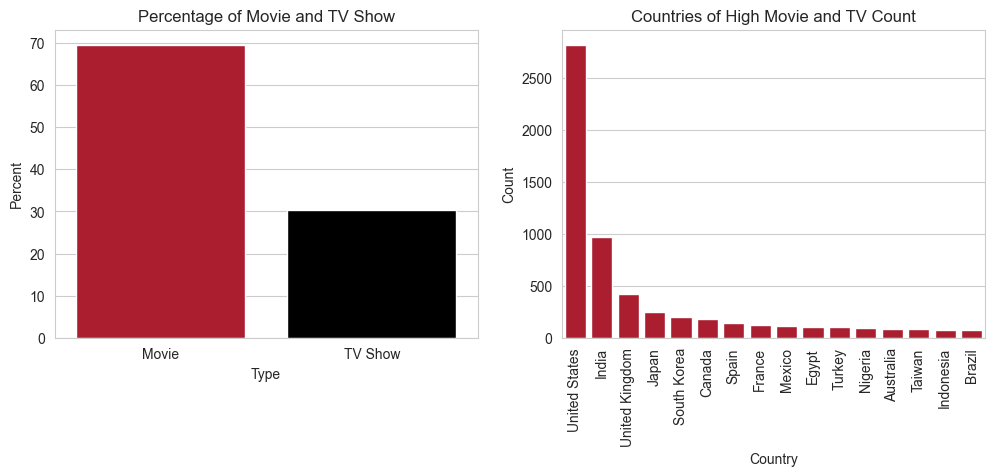

In [20]:
ty=df['type'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
cy=df['country'].value_counts().reset_index().head(16)
fig,axs=plt.subplots(1,2,figsize=(12,4))

g=sns.barplot(data=ty,x='type',y="Percent",ax=axs[0])
g.set(title='Percentage of Movie and TV Show', xlabel='Type', ylabel='Percent');

g=sns.barplot(data=cy,x='country',y="count",color='#c1071e',ax=axs[1])
g.set(title='Countries of High Movie and TV Count', xlabel='Country', ylabel='Count')
g.set_xticklabels(g.get_xticklabels(),rotation=90);


In [7]:
#Creating a filter of the top 5 countries that supply content
countries=["United States","India","United Kingdom","Japan","South Korea"]
dc=df[df['country'].isin(countries)]
dc=dc[dc['year_to_date']>=0]

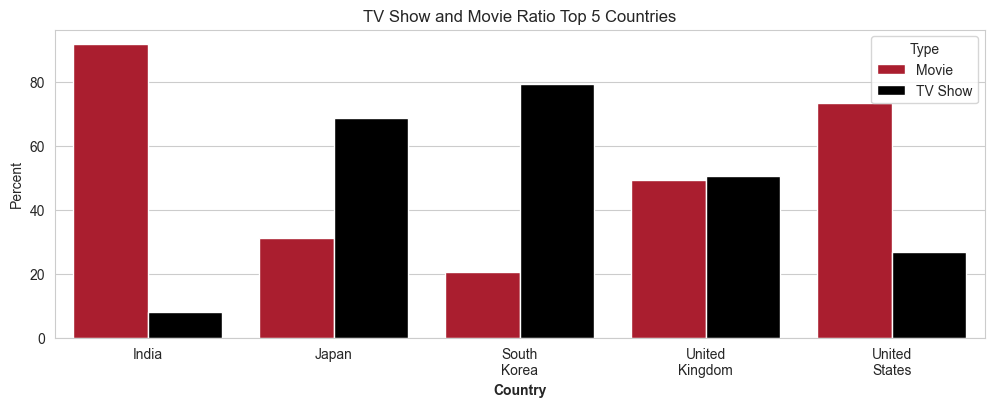

In [8]:
sp=dc.groupby(['country'])['type'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()

fig, axs = plt.subplots(1, 1, figsize=(12, 4))
g=sns.barplot(data=sp,x='country',y="Percent",hue='type')
g.set(title='TV Show and Movie Ratio Top 5 Countries', xlabel='Country', ylabel='Percent')
# Plot seaborn countplot with wrapped tick labels
labels = [textwrap.fill(label.get_text(), 10) for label in g.get_xticklabels()]
g.set_xticklabels(labels);
g.set_xlabel('Country', fontdict=dict(weight='bold'))
g.legend(title='Type');



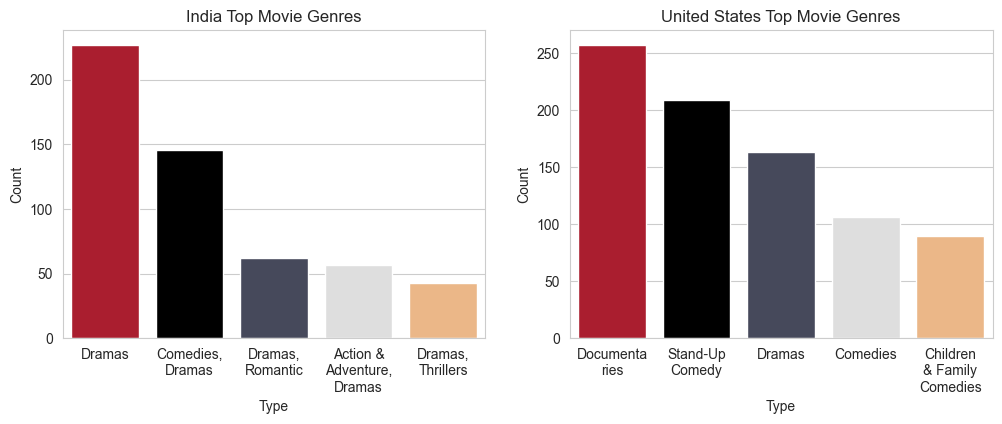

In [9]:
ind=df[(df['country']=="India")&(df['type']=="Movie")]
ind=ind['genre'].value_counts().reset_index().head(5)

us=df[(df['country']=="United States")&(df['type']=="Movie")]
us=us['genre'].value_counts().reset_index().head(5)

fig,axs=plt.subplots(1,2,figsize=(12,4))

g=sns.barplot(data=ind,x='genre',y="count",ax=axs[0])
g.set(title='India Top Movie Genres', xlabel='Type', ylabel='Count');
# Plot seaborn countplot with wrapped tick labels
labels = [textwrap.fill(label.get_text(), 10) for label in g.get_xticklabels()]
g.set_xticklabels(labels);

g=sns.barplot(data=us,x='genre',y="count",ax=axs[1])
g.set(title='United States Top Movie Genres', xlabel='Type', ylabel='Count');
# Plot seaborn countplot with wrapped tick labels
labels = [textwrap.fill(label.get_text(), 9) for label in g.get_xticklabels()]
g.set_xticklabels(labels);

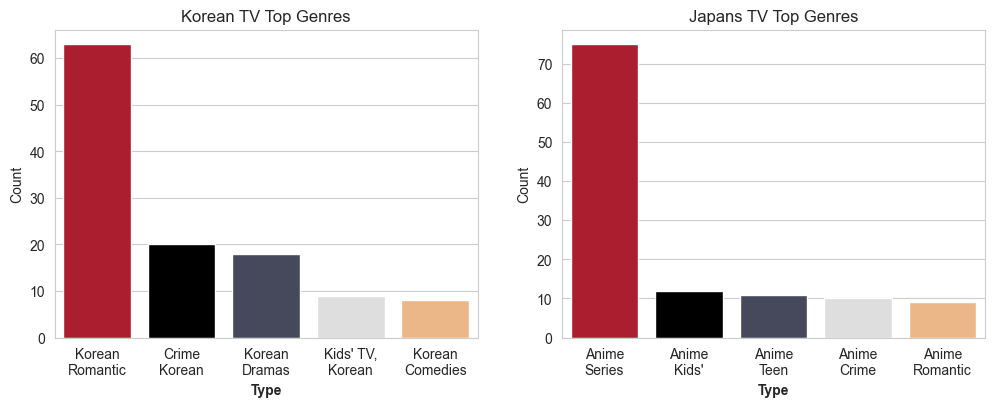

In [10]:
jp=df[(df['country']=="Japan")&(df['type']=="TV Show")]
jp=jp['genre'].value_counts().reset_index().head(5)
# Remove series from name for a neat graph
jp['genre'] = jp['genre'].str.replace('Series,','')

kr=df[(df['country']=="South Korea")&(df['type']=="TV Show")]
kr=kr['genre'].value_counts().reset_index().head(5)

fig,axs=plt.subplots(1,2,figsize=(12,4))

g=sns.barplot(data=kr,x='genre',y="count",ax=axs[0])
g.set(title='Korean TV Top Genres', xlabel='Type', ylabel='Count');
labels = [textwrap.fill(label.get_text(), 10) for label in g.get_xticklabels()]
g.set_xticklabels(labels);
g.set_xlabel('Type', fontdict=dict(weight='bold'))

g=sns.barplot(data=jp,x='genre',y="count",ax=axs[1])
g.set(title='Japans TV Top Genres', xlabel='Type', ylabel='Count');
# Plot seaborn countplot with wrapped tick labels
labels = [textwrap.fill(label.get_text(), 10) for label in g.get_xticklabels()]
g.set_xticklabels(labels);
g.set_xlabel('Type', fontdict=dict(weight='bold'));

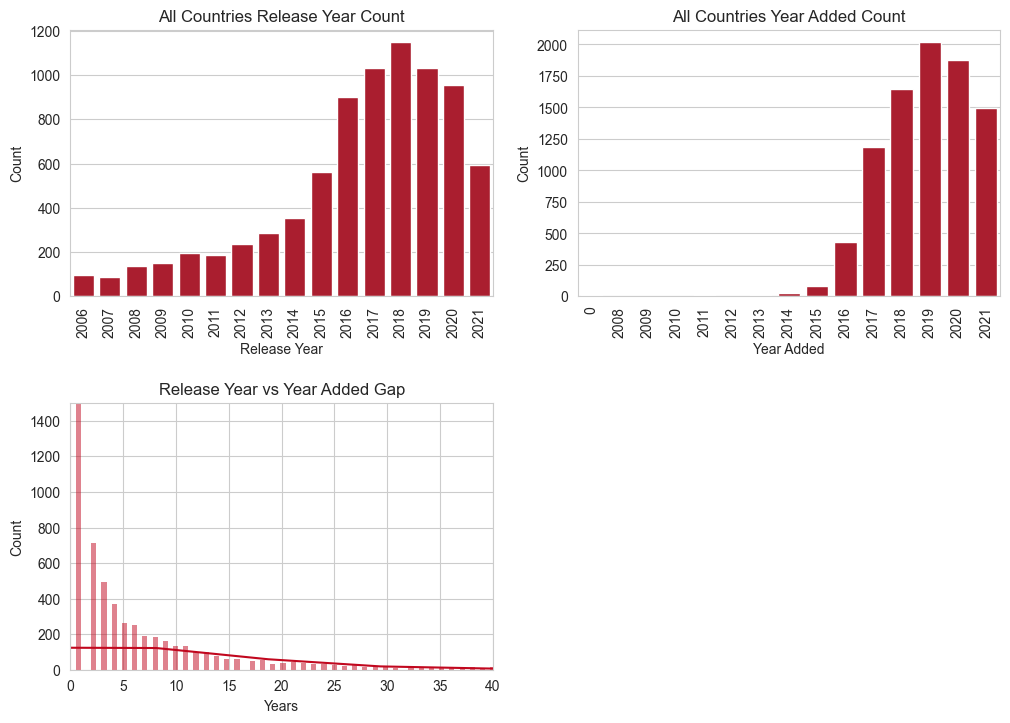

In [11]:
ya=df['year_added'].value_counts().reset_index()
ry=df['release_year'].value_counts().reset_index().head(16)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
g=sns.barplot(data=ry,x='release_year',y="count",color='#c1071e',ax=axs[0,0])
g.set(title='All Countries Release Year Count', xlabel='Release Year', ylabel='Count')
g.set_xticklabels(g.get_xticklabels(),rotation=90);

g=sns.barplot(data=ya,x='year_added',y="count",color='#c1071e',ax=axs[0,1])
g.set(title='All Countries Year Added Count', xlabel='Year Added', ylabel='Count')
g.set_xticklabels(g.get_xticklabels(),rotation=90);

g=sns.histplot(data=df, x='year_to_date',kde=True, color='#c1071e',ax=axs[1,0])
g.set(title='Release Year vs Year Added Gap', xlabel='Years', ylabel='Count')
g.set(xlim=(0, 40))
g.set(ylim=(0, 1500));
plt.subplots_adjust(bottom=0.1,top=0.9,hspace=0.4)

axs[1,1].set_axis_off()


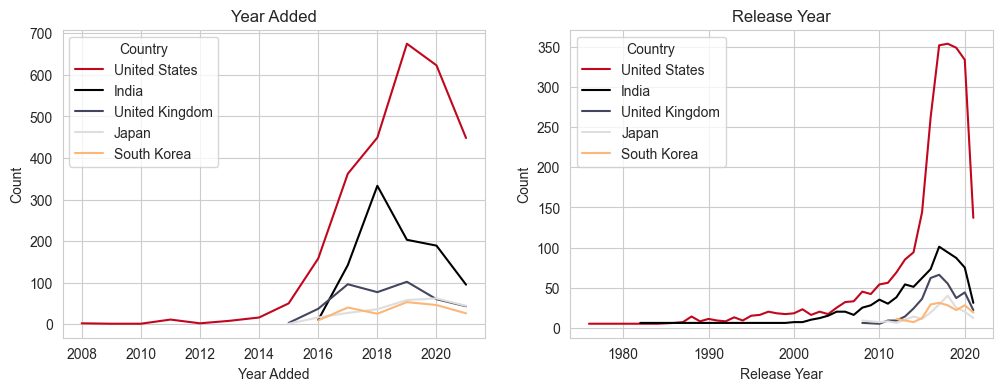

In [21]:
cr=dc.groupby(['country'])['release_year'].value_counts().sort_values(ascending=False).reset_index().head(100)
ca=dc.groupby(['country'])['year_added'].value_counts().sort_values(ascending=False).reset_index().head(50)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
g=sns.lineplot(data=ca,x='year_added',y='count',hue='country',ax=axs[0])
g.set(title='Year Added', xlabel='Year Added', ylabel='Count')

g.legend(title='Country');

g=sns.lineplot(data=cr,x='release_year',y='count',hue='country',ax=axs[1])
g.set(title='Release Year', xlabel='Release Year', ylabel='Count')

g.legend(title='Country');

In [13]:
grouped = df.groupby('director').agg({"director":['value_counts'],"genre":[max]})
# Using ravel, and a string join, we can create better names for the columns:
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

In [14]:
grouped=grouped.reset_index()

In [15]:
gg=grouped.sort_values(by='director_value_counts',ascending=False).head(10)

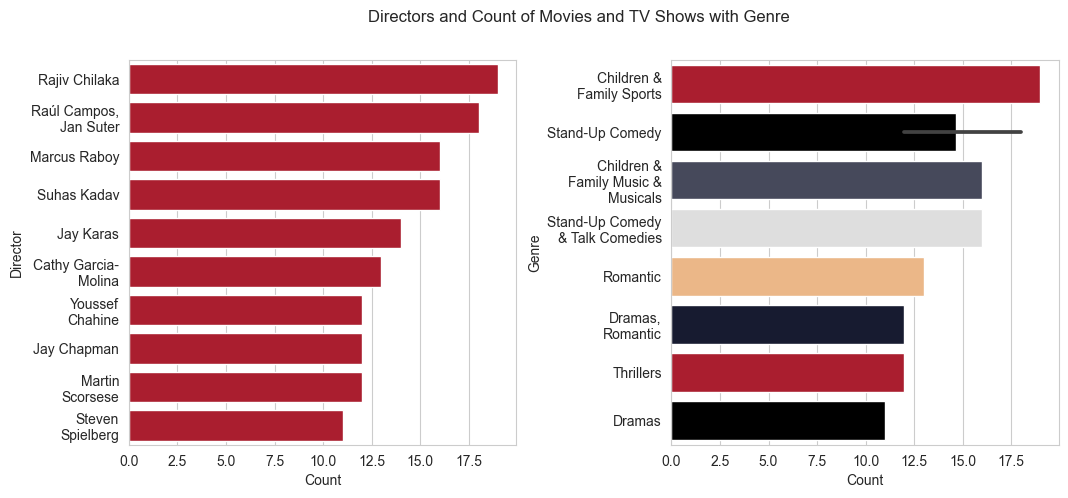

In [16]:
dr=df['director'].value_counts().sort_values(ascending=False).reset_index().head(10)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Directors and Count of Movies and TV Shows with Genre')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

g=sns.barplot(data=dr,x='count',y="director",color='#c1071e',ax=axs[0])
g.set(title='', xlabel='Count', ylabel='Director');
labels = [textwrap.fill(label.get_text(), 13) for label in g.get_yticklabels()]
g.set_yticklabels(labels);

g=sns.barplot(data=gg,y='genre_max',x="director_value_counts",ax=axs[1])
g.set(title='', xlabel='Count', ylabel='Genre');
labels = [textwrap.fill(label.get_text(), 15) for label in g.get_yticklabels()]
g.set_yticklabels(labels);


# Conlusion

- There are more Movies than TV Shows on the Netflix platform, Movies contribute to almost 70% of the content.The Top 5 countries with content are the United States, India, Japan and South Korea and Britain.

- All countries produce different type of content, with India and United States majoring in Movies and Japan and South Korea love TV content. The genres are also surprisingly different, the United States are big on Ducumenteries and Standu-Up Comedy while Japan love anything Anime

- The years 2018 and 2019 were the peak years for content added on Netflix and since then there has been a decline in content added on thier platform

